# Correction of practice 6

In [1]:
import requests
from bs4 import BeautifulSoup

In [ ]:
headers = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0'}
resp = requests.get('https://news.google.com/search?q=apple', headers = headers)
print(resp.content)

In [4]:
soup = BeautifulSoup(resp.content)

In [ ]:
print(soup.prettify())

In [ ]:
for i in soup.find_all('a', class_ = "DY5T1d RZIKme"):
    print(i.text)

In [8]:
links = []
for i in soup.find_all('a', class_ = "DY5T1d RZIKme"):
    links.append("https://news.google.com" + i['href'][1:])

In [9]:
import datetime
for i in soup.find_all('time', class_ = "WW6dff uQIVzc Sksgp slhocf"):
    t = i['datetime']
    t = datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ")
    print(t)

2022-10-18 14:54:54
2022-10-23 00:53:55
2022-10-18 14:55:58
2022-10-19 19:58:07
2022-10-18 19:12:33
2022-10-18 14:59:06
2022-10-22 13:00:00
2022-10-18 12:04:09
2022-10-20 13:08:00
2022-10-15 16:55:15
2022-10-23 12:08:45
2022-10-20 14:01:57
2022-10-22 11:01:05
2022-10-22 17:24:16
2022-10-22 10:59:51
2022-10-20 19:13:24
2022-10-06 07:00:00
2022-10-16 18:31:51
2022-10-22 16:39:46
2022-10-21 20:01:47
2022-10-23 10:00:52
2022-10-22 20:09:58
2022-10-21 22:35:10
2022-10-13 07:00:00
2022-10-23 12:57:01
2022-10-22 10:00:00
2022-10-21 19:49:00
2022-10-21 17:09:18
2022-10-17 23:04:17
2022-10-23 10:51:43
2022-10-03 07:00:00
2022-10-18 18:26:43
2022-10-21 21:38:07
2022-10-21 11:24:36
2022-10-21 23:17:23
2022-10-22 21:00:43
2022-10-23 08:00:54
2022-10-23 09:21:49
2022-10-16 17:35:43
2022-10-21 15:22:38
2022-10-21 11:52:00
2022-10-15 16:14:51
2022-10-21 20:46:10
2022-10-23 10:38:03
2022-10-22 22:00:14
2022-10-17 20:02:08
2022-10-12 16:00:08
2022-10-04 10:48:10
2022-10-22 15:00:01
2022-10-09 13:45:18


In [10]:
print(links[0])
r = requests.get(links[0], headers =headers)
s = BeautifulSoup(r.content)
print(s.prettify())

https://news.google.com/articles/CBMiYWh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIyLzEwL2FwcGxlLWludHJvZHVjZXMtdGhlLXBvd2VyZnVsLW5leHQtZ2VuZXJhdGlvbi1hcHBsZS10di00ay_SAQA?hl=en-US&gl=US&ceid=US%3Aen
<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <base href="https://news.google.com/"/>
  <meta content="origin" name="referrer"/>
  <link href="https://news.google.com/articles/CBMiYWh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIyLzEwL2FwcGxlLWludHJvZHVjZXMtdGhlLXBvd2VyZnVsLW5leHQtZ2VuZXJhdGlvbi1hcHBsZS10di00ay_SAQA" rel="canonical"/>
  <meta content="width=device-width,initial-scale=1,minimal-ui" name="viewport"/>
  <meta content="AcBy5YFny2HQgVUCR18tO5YUTf6MpVlcJqGTd-a9-SI" name="google-site-verification"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="News" name="application-name"/>
  <meta content="News" name="apple-mobile-web-app-title"/>
  <meta content="black" name="apple-mobile-web-app-sta

In [11]:
print(s.find('a', jsname = "tljFtd").text)

https://www.apple.com/newsroom/2022/10/apple-introduces-the-powerful-next-generation-apple-tv-4k/


# Lecture 7 : Data cleaning

In [1]:
#import
import pandas as pd
import numpy as np


In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\csv_to_clean.csv")
print(df)



            PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH   SQ_M
0   100001000.0   104.0      PUTNAM            Y            3        1    100
1   100002000.0   197.0   LEXINGTON            N            3      1.5     --
2   100003000.0     NaN   LEXINGTON            N          NaN        1     85
3   100004000.0   201.0    BERKELEY           12            1      NaN     70
4           NaN   203.0    BERKELEY            Y            3        2    160
5   100006000.0   207.0    BERKELEY            Y          NaN        1  80000
6   100007000.0     NaN  WASHINGTON          NaN            2   HURLEY     95
7   100008000.0   213.0     TREMONT            Y            1        1    NaN
8   100009000.0   215.0     TREMONT            Y           na        2    180
9   100009000.0   215.0     TREMONT            Y           na        2    180
10  100009000.0   215.0     TREMONT            Y           na        2    180
11  100002000.0   197.0   LEXINGTON            N            3   

## Finding missing values

In [3]:
#Find the standard missing values isnull function
print(df.isnull().sum().sum())

8


In [4]:
#Non standard missing values : na_values in the read_csv function
#use of unique function to identify them
missing_values= ['na', '--']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\csv_to_clean.csv",
                na_values = missing_values)
print(df)
print('----')
print(df.isnull().sum().sum())

            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0      PUTNAM            Y           3.0        1   
1   100002000.0   197.0   LEXINGTON            N           3.0      1.5   
2   100003000.0     NaN   LEXINGTON            N           NaN        1   
3   100004000.0   201.0    BERKELEY           12           1.0      NaN   
4           NaN   203.0    BERKELEY            Y           3.0        2   
5   100006000.0   207.0    BERKELEY            Y           NaN        1   
6   100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   
7   100008000.0   213.0     TREMONT            Y           1.0        1   
8   100009000.0   215.0     TREMONT            Y           NaN        2   
9   100009000.0   215.0     TREMONT            Y           NaN        2   
10  100009000.0   215.0     TREMONT            Y           NaN        2   
11  100002000.0   197.0   LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.

In [5]:
#Unexpected format missing values : check if value can be int for example
for index, lines in df.iterrows():
    try:
        a = int(lines['OWN_OCCUPIED'])
        print(a)
        df.iloc[3, 3] = np.nan
    except:
        pass

print(df)


12
            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0      PUTNAM            Y           3.0        1   
1   100002000.0   197.0   LEXINGTON            N           3.0      1.5   
2   100003000.0     NaN   LEXINGTON            N           NaN        1   
3   100004000.0   201.0    BERKELEY          NaN           1.0      NaN   
4           NaN   203.0    BERKELEY            Y           3.0        2   
5   100006000.0   207.0    BERKELEY            Y           NaN        1   
6   100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   
7   100008000.0   213.0     TREMONT            Y           1.0        1   
8   100009000.0   215.0     TREMONT            Y           NaN        2   
9   100009000.0   215.0     TREMONT            Y           NaN        2   
10  100009000.0   215.0     TREMONT            Y           NaN        2   
11  100002000.0   197.0   LEXINGTON            N           3.0      1.5   

       SQ_M  
0     1

In [6]:
# a bit about try/except

try:
    while True:
        continue
except:
    print('error')
print('my code continue')

error
my code continue


In [6]:
#Check the sum of missing values
print(df.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    5
NUM_BATH        1
SQ_M            3
dtype: int64


In [7]:
#YOUR TURN (15 minutes) => Then break
#Find all missing values in the provided dataframe
#Check all the null
#Find the other types of missing values
#There are '-', 'ERROR', wrong date, 'NaN', no data
import pandas as pd
import numpy as np
missing_values= ['-', 'ERROR']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\Apple_price_to_clean.csv",
                na_values = missing_values)

print(df)
print(df.isnull().sum())

for index, lines in df.iterrows():
    try:
        a = int(lines['Date'])
        print(a)
        df.loc[index, 'Date'] = np.nan
    except:
        pass
print(df.head(20))

            Date        Open        High         Low       Close   Adj Close  \
0     2015-08-25   27.777500         NaN         NaN   25.934999         NaN   
1     2015-08-26   26.772499   27.472500   26.262501   27.422501   25.039267   
2     2015-08-27   28.057501   28.309999   27.504999   28.230000   25.776581   
3     2015-08-28   28.042500   28.327499   27.885000   28.322500   25.861042   
4     2015-08-31   28.007500   28.632500   28.000000   28.190001   25.740063   
...          ...         ...         ...         ...         ...         ...   
1769  2022-08-18  173.750000  174.899994  173.119995  174.149994  174.149994   
1770  2022-08-19  173.029999  173.740005  171.309998  171.520004  171.520004   
1771  2022-08-22  169.690002  169.860001  167.139999  167.570007  167.570007   
1772  2022-08-23  167.080002  168.710007  166.649994  167.229996  167.229996   
1773  2022-08-24  167.320007  168.110001  166.250000  167.529999  167.529999   

           Volume  
0     414406400.0  

## Replacing missing values

In [8]:
#reload df
missing_values= ['na', '--']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\csv_to_clean.csv",
                na_values = missing_values)
print(df)

            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0      PUTNAM            Y           3.0        1   
1   100002000.0   197.0   LEXINGTON            N           3.0      1.5   
2   100003000.0     NaN   LEXINGTON            N           NaN        1   
3   100004000.0   201.0    BERKELEY           12           1.0      NaN   
4           NaN   203.0    BERKELEY            Y           3.0        2   
5   100006000.0   207.0    BERKELEY            Y           NaN        1   
6   100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   
7   100008000.0   213.0     TREMONT            Y           1.0        1   
8   100009000.0   215.0     TREMONT            Y           NaN        2   
9   100009000.0   215.0     TREMONT            Y           NaN        2   
10  100009000.0   215.0     TREMONT            Y           NaN        2   
11  100002000.0   197.0   LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.

In [9]:
#delete lines with dropna with subset and inplace aeguments
# df = df.dropna()
# print(df)
df.dropna(inplace = True, subset = 'ST_NUM')
print(df)

            PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0     PUTNAM            Y           3.0        1   
1   100002000.0   197.0  LEXINGTON            N           3.0      1.5   
3   100004000.0   201.0   BERKELEY           12           1.0      NaN   
4           NaN   203.0   BERKELEY            Y           3.0        2   
5   100006000.0   207.0   BERKELEY            Y           NaN        1   
7   100008000.0   213.0    TREMONT            Y           1.0        1   
8   100009000.0   215.0    TREMONT            Y           NaN        2   
9   100009000.0   215.0    TREMONT            Y           NaN        2   
10  100009000.0   215.0    TREMONT            Y           NaN        2   
11  100002000.0   197.0  LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.0  
1       NaN  
3      70.0  
4     160.0  
5   80000.0  
7       NaN  
8     180.0  
9     180.0  
10    180.0  
11      NaN  


In [10]:
# Location based replacement with the loc function
df.loc[3, 'NUM_BATH'] = 1
print(df)

            PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0     PUTNAM            Y           3.0        1   
1   100002000.0   197.0  LEXINGTON            N           3.0      1.5   
3   100004000.0   201.0   BERKELEY           12           1.0        1   
4           NaN   203.0   BERKELEY            Y           3.0        2   
5   100006000.0   207.0   BERKELEY            Y           NaN        1   
7   100008000.0   213.0    TREMONT            Y           1.0        1   
8   100009000.0   215.0    TREMONT            Y           NaN        2   
9   100009000.0   215.0    TREMONT            Y           NaN        2   
10  100009000.0   215.0    TREMONT            Y           NaN        2   
11  100002000.0   197.0  LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.0  
1       NaN  
3      70.0  
4     160.0  
5   80000.0  
7       NaN  
8     180.0  
9     180.0  
10    180.0  
11      NaN  


In [11]:
# Replace missing values with a number (fillna() function with inplace arg)
df.fillna(0, inplace = True)
print(df)

            PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0     PUTNAM            Y           3.0        1   
1   100002000.0   197.0  LEXINGTON            N           3.0      1.5   
3   100004000.0   201.0   BERKELEY           12           1.0        1   
4           0.0   203.0   BERKELEY            Y           3.0        2   
5   100006000.0   207.0   BERKELEY            Y           0.0        1   
7   100008000.0   213.0    TREMONT            Y           1.0        1   
8   100009000.0   215.0    TREMONT            Y           0.0        2   
9   100009000.0   215.0    TREMONT            Y           0.0        2   
10  100009000.0   215.0    TREMONT            Y           0.0        2   
11  100002000.0   197.0  LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.0  
1       0.0  
3      70.0  
4     160.0  
5   80000.0  
7       0.0  
8     180.0  
9     180.0  
10    180.0  
11      0.0  


In [12]:
#Replacing the missing values with a median 
#(calculate median and then use the replace with a number)
# print(df)
print(df['NUM_BEDROOMS'].mean())
df['NUM_BEDROOMS'].fillna(df['NUM_BEDROOMS'].mean(), inplace = True)
print(df)

1.4
            PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0     PUTNAM            Y           3.0        1   
1   100002000.0   197.0  LEXINGTON            N           3.0      1.5   
3   100004000.0   201.0   BERKELEY           12           1.0        1   
4           0.0   203.0   BERKELEY            Y           3.0        2   
5   100006000.0   207.0   BERKELEY            Y           0.0        1   
7   100008000.0   213.0    TREMONT            Y           1.0        1   
8   100009000.0   215.0    TREMONT            Y           0.0        2   
9   100009000.0   215.0    TREMONT            Y           0.0        2   
10  100009000.0   215.0    TREMONT            Y           0.0        2   
11  100002000.0   197.0  LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.0  
1       0.0  
3      70.0  
4     160.0  
5   80000.0  
7       0.0  
8     180.0  
9     180.0  
10    180.0  
11      0.0  


In [53]:
#Replacing the values by the one before or after : df.fillna(method='bfill')
df['NUM_BEDROOMS'].fillna(method = 'bfill', inplace = True)
print(df)

            PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0     PUTNAM            Y           3.0        1   
1   100002000.0   197.0  LEXINGTON            N           3.0      1.5   
3   100004000.0   201.0   BERKELEY           12           1.0        1   
4           0.0   203.0   BERKELEY            Y           3.0        2   
5   100006000.0   207.0   BERKELEY            Y           0.0        1   
7   100008000.0   213.0    TREMONT            Y           1.0        1   
8   100009000.0   215.0    TREMONT            Y           0.0        2   
9   100009000.0   215.0    TREMONT            Y           0.0        2   
10  100009000.0   215.0    TREMONT            Y           0.0        2   
11  100002000.0   197.0  LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.0  
1       0.0  
3      70.0  
4     160.0  
5   80000.0  
7       0.0  
8     180.0  
9     180.0  
10    180.0  
11      0.0  


In [54]:
#YOUR TURN 5 minutes => 12:27
#replace all the missing values in the previous dataframe with the frontfilling (ffill) method 
#put 0 for the first ones
df.fillna(method = 'ffill', inplace = True)
df.fillna(0, inplace = True)
print(df)

            PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0     PUTNAM            Y           3.0        1   
1   100002000.0   197.0  LEXINGTON            N           3.0      1.5   
3   100004000.0   201.0   BERKELEY           12           1.0        1   
4           0.0   203.0   BERKELEY            Y           3.0        2   
5   100006000.0   207.0   BERKELEY            Y           0.0        1   
7   100008000.0   213.0    TREMONT            Y           1.0        1   
8   100009000.0   215.0    TREMONT            Y           0.0        2   
9   100009000.0   215.0    TREMONT            Y           0.0        2   
10  100009000.0   215.0    TREMONT            Y           0.0        2   
11  100002000.0   197.0  LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.0  
1       0.0  
3      70.0  
4     160.0  
5   80000.0  
7       0.0  
8     180.0  
9     180.0  
10    180.0  
11      0.0  


## Removing useless data

In [13]:
#reload df
import pandas as pd
missing_values= ['na', '--']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\csv_to_clean.csv",
                na_values = missing_values)
print(df)

            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0      PUTNAM            Y           3.0        1   
1   100002000.0   197.0   LEXINGTON            N           3.0      1.5   
2   100003000.0     NaN   LEXINGTON            N           NaN        1   
3   100004000.0   201.0    BERKELEY           12           1.0      NaN   
4           NaN   203.0    BERKELEY            Y           3.0        2   
5   100006000.0   207.0    BERKELEY            Y           NaN        1   
6   100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   
7   100008000.0   213.0     TREMONT            Y           1.0        1   
8   100009000.0   215.0     TREMONT            Y           NaN        2   
9   100009000.0   215.0     TREMONT            Y           NaN        2   
10  100009000.0   215.0     TREMONT            Y           NaN        2   
11  100002000.0   197.0   LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.

In [56]:
#Use the drop() function with inplace and axis arg
df.drop(['PID'], axis = 1, inplace = True)
print(df)

    ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH     SQ_M
0    104.0      PUTNAM            Y           3.0        1    100.0
1    197.0   LEXINGTON            N           3.0      1.5      NaN
2      NaN   LEXINGTON            N           NaN        1     85.0
3    201.0    BERKELEY           12           1.0      NaN     70.0
4    203.0    BERKELEY            Y           3.0        2    160.0
5    207.0    BERKELEY            Y           NaN        1  80000.0
6      NaN  WASHINGTON          NaN           2.0   HURLEY     95.0
7    213.0     TREMONT            Y           1.0        1      NaN
8    215.0     TREMONT            Y           NaN        2    180.0
9    215.0     TREMONT            Y           NaN        2    180.0
10   215.0     TREMONT            Y           NaN        2    180.0
11   197.0   LEXINGTON            N           3.0      1.5      NaN


In [57]:
#Use the drop duplicates to remove useless lines
df.drop_duplicates(inplace = True)
print(df)

   ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH     SQ_M
0   104.0      PUTNAM            Y           3.0        1    100.0
1   197.0   LEXINGTON            N           3.0      1.5      NaN
2     NaN   LEXINGTON            N           NaN        1     85.0
3   201.0    BERKELEY           12           1.0      NaN     70.0
4   203.0    BERKELEY            Y           3.0        2    160.0
5   207.0    BERKELEY            Y           NaN        1  80000.0
6     NaN  WASHINGTON          NaN           2.0   HURLEY     95.0
7   213.0     TREMONT            Y           1.0        1      NaN
8   215.0     TREMONT            Y           NaN        2    180.0


In [14]:
#YOUR TURN 5 minutes
#Drop all duplicates in your df
#get number of rows
#drop duplicates
#get number of row again
missing_values= ['-', 'ERROR']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\Apple_price_to_clean.csv",
                na_values = missing_values)
print(df)
df.drop_duplicates(inplace=True)
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2015-08-25   27.777500         NaN         NaN   25.934999         NaN   
1     2015-08-26   26.772499   27.472500   26.262501   27.422501   25.039267   
2     2015-08-27   28.057501   28.309999   27.504999   28.230000   25.776581   
3     2015-08-28   28.042500   28.327499   27.885000   28.322500   25.861042   
4     2015-08-31   28.007500   28.632500   28.000000   28.190001   25.740063   
...          ...         ...         ...         ...         ...         ...   
1769  2022-08-18  173.750000  174.899994  173.119995  174.149994  174.149994   
1770  2022-08-19  173.029999  173.740005  171.309998  171.520004  171.520004   
1771  2022-08-22  169.690002  169.860001  167.139999  167.570007  167.570007   
1772  2022-08-23  167.080002  168.710007  166.649994  167.229996  167.229996   
1773  2022-08-24  167.320007  168.110001  166.250000  167.529999  167.529999   

           Volume  
0     414406400.0  

## Outliers

In [15]:
#reload df
import pandas as pd
missing_values= ['na', '--']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\csv_to_clean.csv",
                na_values = missing_values)
print(df)

            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0   100001000.0   104.0      PUTNAM            Y           3.0        1   
1   100002000.0   197.0   LEXINGTON            N           3.0      1.5   
2   100003000.0     NaN   LEXINGTON            N           NaN        1   
3   100004000.0   201.0    BERKELEY           12           1.0      NaN   
4           NaN   203.0    BERKELEY            Y           3.0        2   
5   100006000.0   207.0    BERKELEY            Y           NaN        1   
6   100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   
7   100008000.0   213.0     TREMONT            Y           1.0        1   
8   100009000.0   215.0     TREMONT            Y           NaN        2   
9   100009000.0   215.0     TREMONT            Y           NaN        2   
10  100009000.0   215.0     TREMONT            Y           NaN        2   
11  100002000.0   197.0   LEXINGTON            N           3.0      1.5   

       SQ_M  
0     100.

In [16]:
#With the describe method
print(df.describe())

                PID      ST_NUM  NUM_BEDROOMS          SQ_M
count  1.100000e+01   10.000000      7.000000      9.000000
mean   1.000055e+08  196.700000      2.285714   9005.555556
std    3.142090e+03   33.380134      0.951190  26622.954551
min    1.000010e+08  104.000000      1.000000     70.000000
25%    1.000025e+08  198.000000      1.500000     95.000000
50%    1.000060e+08  205.000000      3.000000    160.000000
75%    1.000085e+08  214.500000      3.000000    180.000000
max    1.000090e+08  215.000000      3.000000  80000.000000


<AxesSubplot: >

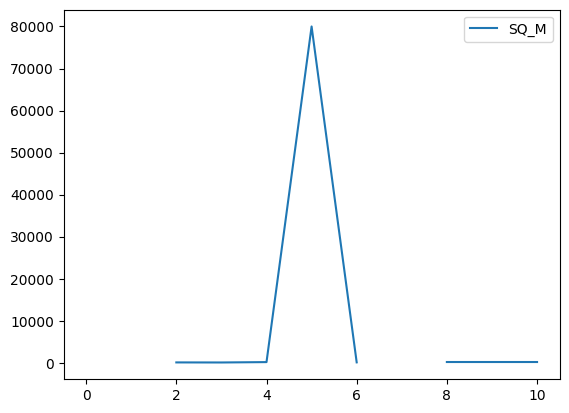

In [17]:
# With the plot method
df.plot(y = 'SQ_M')

            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_M
0   100001000.0   104.0      PUTNAM            Y           3.0        1  100.0
2   100003000.0     NaN   LEXINGTON            N           NaN        1   85.0
3   100004000.0   201.0    BERKELEY           12           1.0      NaN   70.0
4           NaN   203.0    BERKELEY            Y           3.0        2  160.0
6   100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   95.0
8   100009000.0   215.0     TREMONT            Y           NaN        2  180.0
9   100009000.0   215.0     TREMONT            Y           NaN        2  180.0
10  100009000.0   215.0     TREMONT            Y           NaN        2  180.0


<AxesSubplot: >

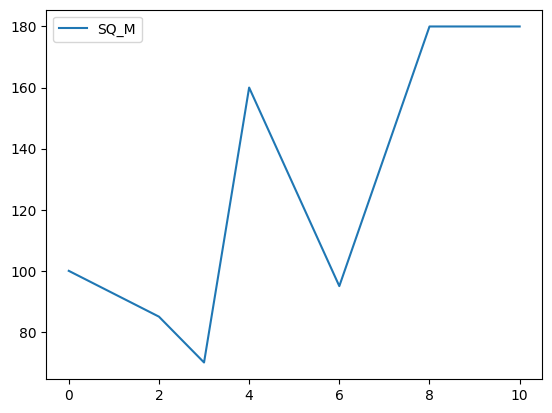

In [18]:
#select the df in the range
# print(df)
df = df[df['SQ_M'] < 10000]
print(df)
df.plot(y = 'SQ_M')

In [19]:
#YOUR TURN 10 minutes
#Find the outliers in your dataset and remove them
import pandas as pd
missing_values= ['-', 'ERROR']
df = pd.read_csv(r"C:\Users\leila\OneDrive\Рабочий стол\IKT\lects\lect7\Apple_price_to_clean.csv",
                na_values = missing_values)
df.drop_duplicates(inplace=True)
df = df[df['High'] > 0]
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1759.000000  1760.000000  1759.000000  1757.000000  1760.000000   
mean     73.506770    74.054901    73.226885    72.948631    71.805287   
std      48.998620    48.561544    58.140202    49.780753    48.451877   
min      22.500000    22.917500    22.367500  -470.599998    20.949606   
25%      36.438751    36.788751    36.237501    36.570000    34.484875   
50%      50.049999    50.385001    49.610001    50.119999    48.677069   
75%     120.955002   122.625002   119.205002   120.959999   119.565588   
max     500.099998   182.940002  1490.339996   182.009995   181.259918   

             Volume  
count  1.758000e+03  
mean   1.325885e+08  
std    2.770364e+08  
min    4.100000e+07  
25%    8.567892e+07  
50%    1.093036e+08  
75%    1.477417e+08  
max    1.146192e+10  


<AxesSubplot: xlabel='Date'>

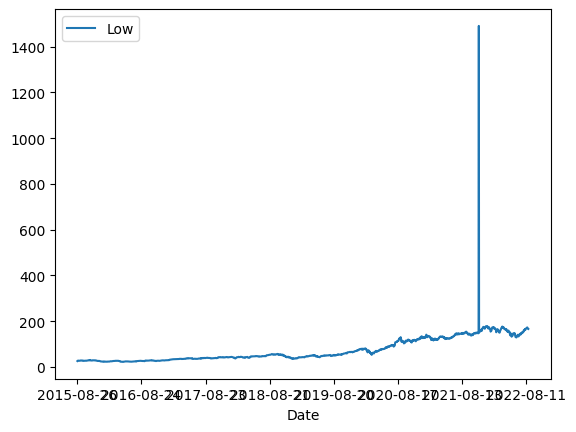

In [20]:
df.plot(x = 'Date', y = 'Low')

<AxesSubplot: xlabel='Date'>

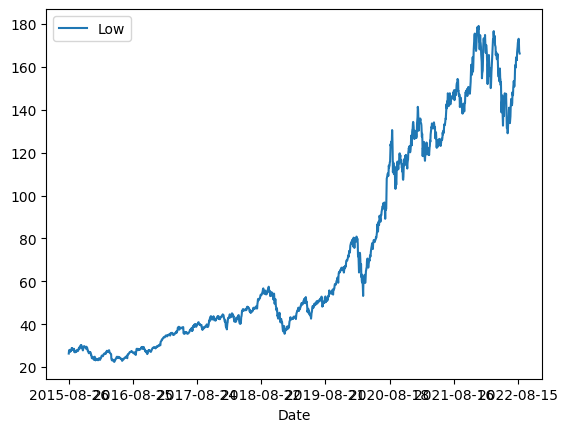

In [21]:
df = df[df['Low'] < 200]
df.plot(x = 'Date', y = 'Low')

<AxesSubplot: xlabel='Date'>

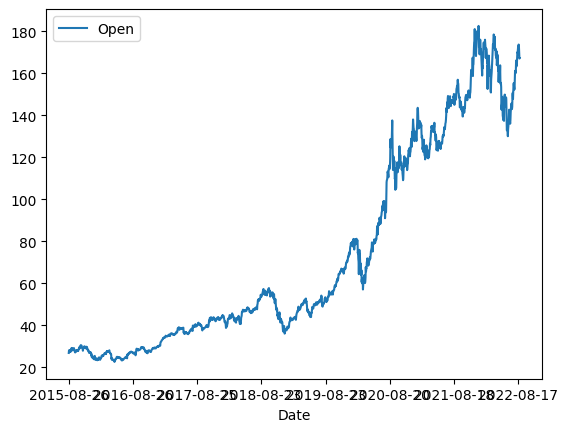

In [22]:
df = df[df['Open'] < 200]
df.plot(x = 'Date', y = 'Open')